In [24]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thakrav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thakrav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thakrav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/thakrav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
import os
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict, combine_multiple_text_files


In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
ddf = {i:val for i, val in enumerate(corpus)}
print(ddf)

{0: 'This is the first document.', 1: 'This document is the second document.', 2: 'And this is the third one.', 3: 'Is this the first document?'}


In [28]:
paragraph_cleaner = ParagraphCleaner(ddf)

In [29]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the", header=True)

› Found Total 4 Paragraphs from the


In [30]:
cleaned_paragraphs

{0: 'first document',
 1: 'document second document',
 2: 'third one',
 3: 'first document'}

In [31]:
paragraph_analysis = ParagraphAnalysis(
    ddf, 
    out_dir="./dummy"
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› Found 26 Words.


In [32]:
paragraph_analysis.paragraphs_df.head()

,id,paragraphs,sentences,words,paragraph_chars_count,paragraph_words_count,paragraph_avg_word_len
0,0,This is the first document.,[This is the first document.],"[This, is, the, first, document, .]",27,6,3.833333
1,1,This document is the second document.,[This document is the second document.],"[This, document, is, the, second, document, .]",37,7,4.571429
2,2,And this is the third one.,[And this is the third one.],"[And, this, is, the, third, one, .]",26,7,3.000000
3,3,Is this the first document?,[Is this the first document?],"[Is, this, the, first, document, ?]",27,6,3.833333


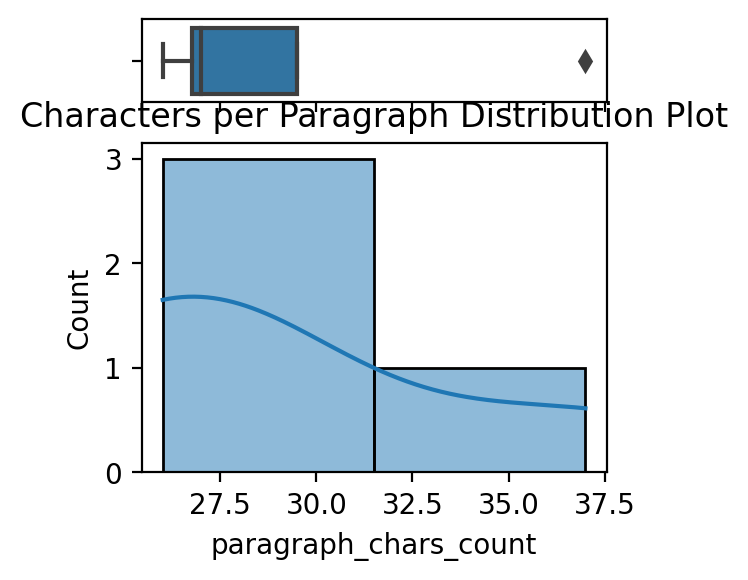

In [33]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

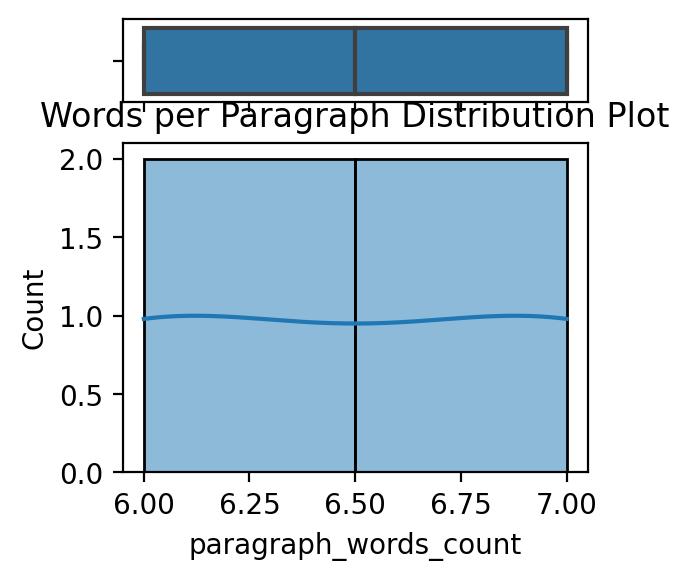

In [34]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

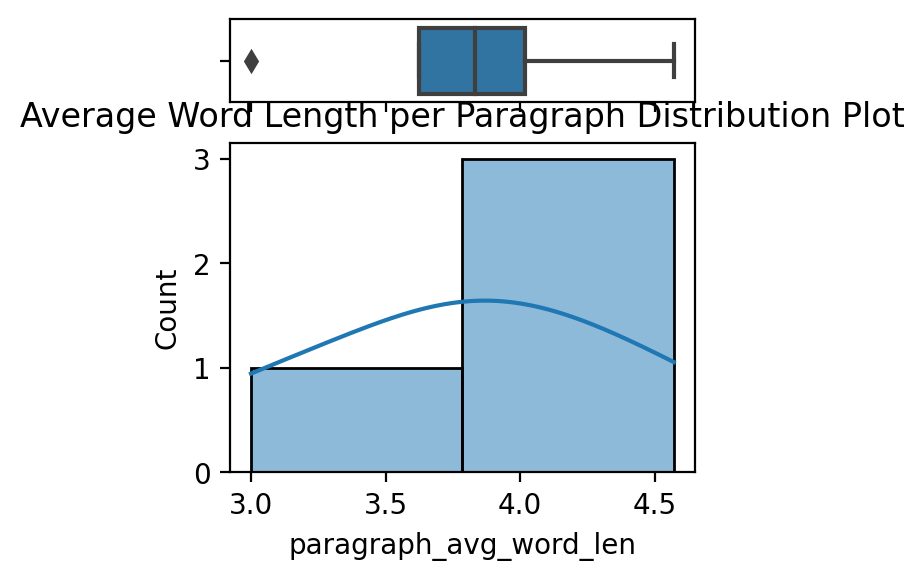

In [35]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

In [36]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 3 unique stop words


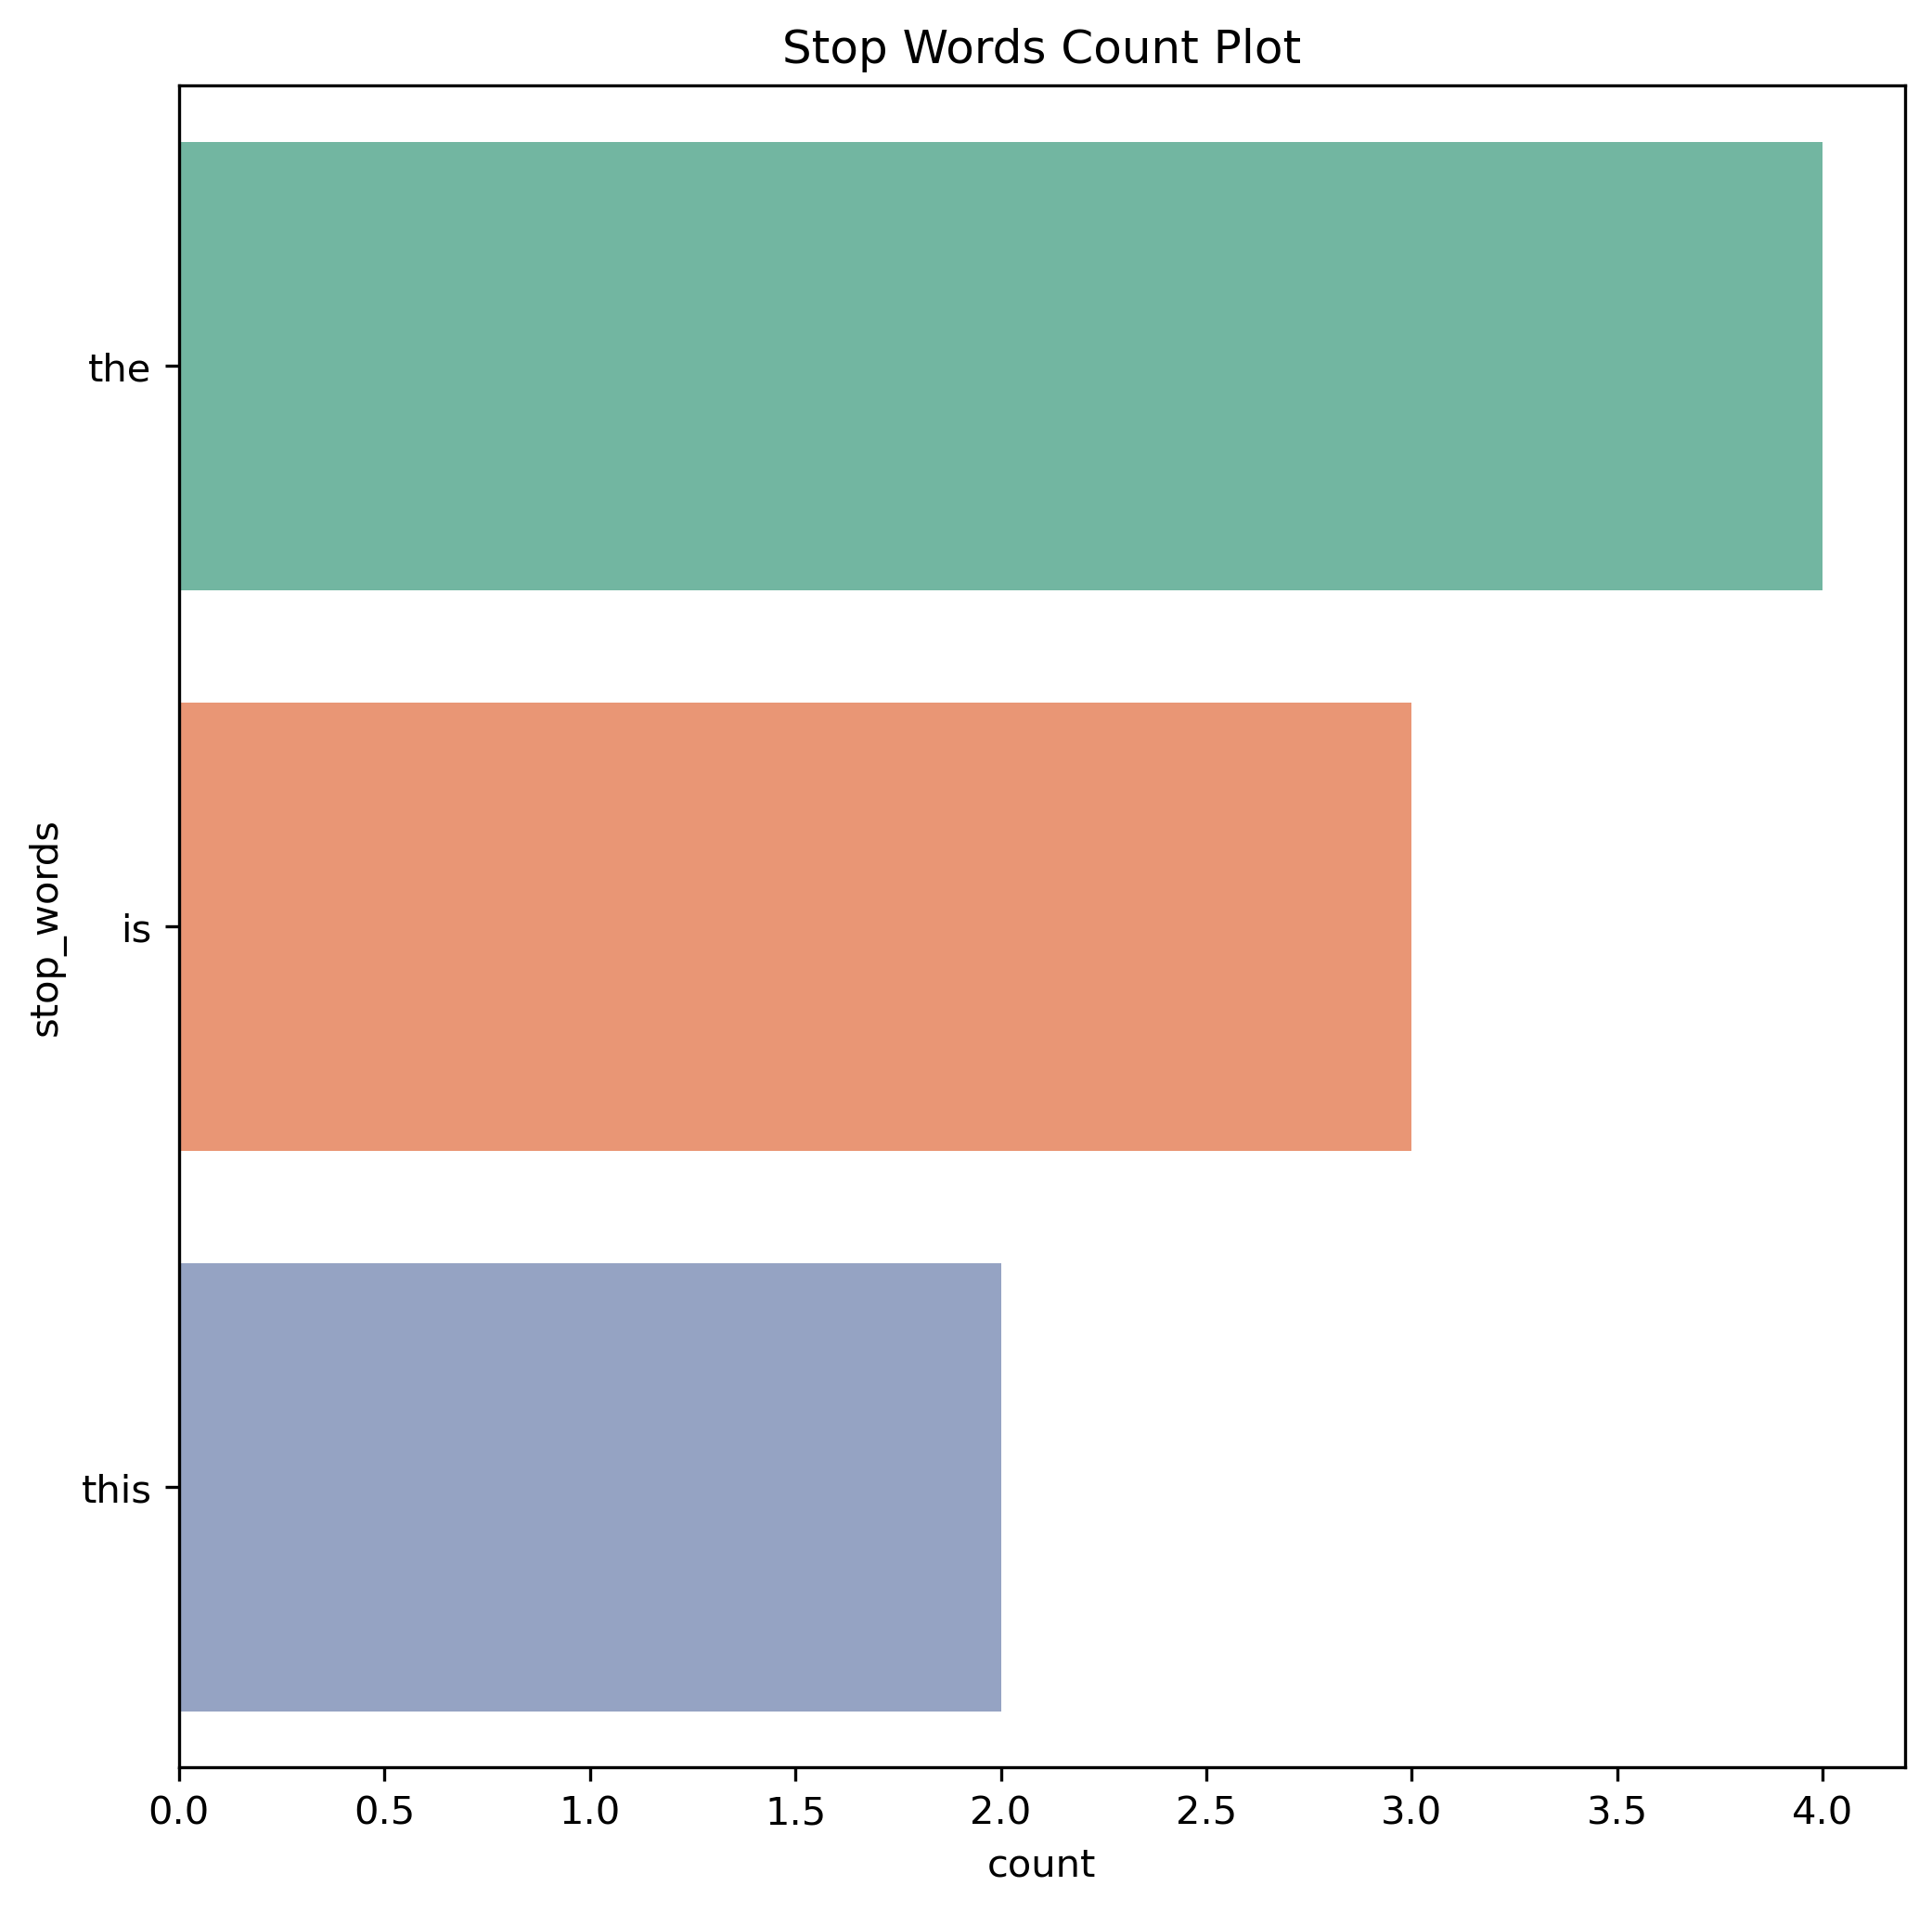

In [37]:
if len(stop_words_corpus.keys()) > 0:
    top_k = 25
    top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
    paragraph_analysis.plot_top_k_stop_words(
        top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

In [38]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 10 unique non-stop words


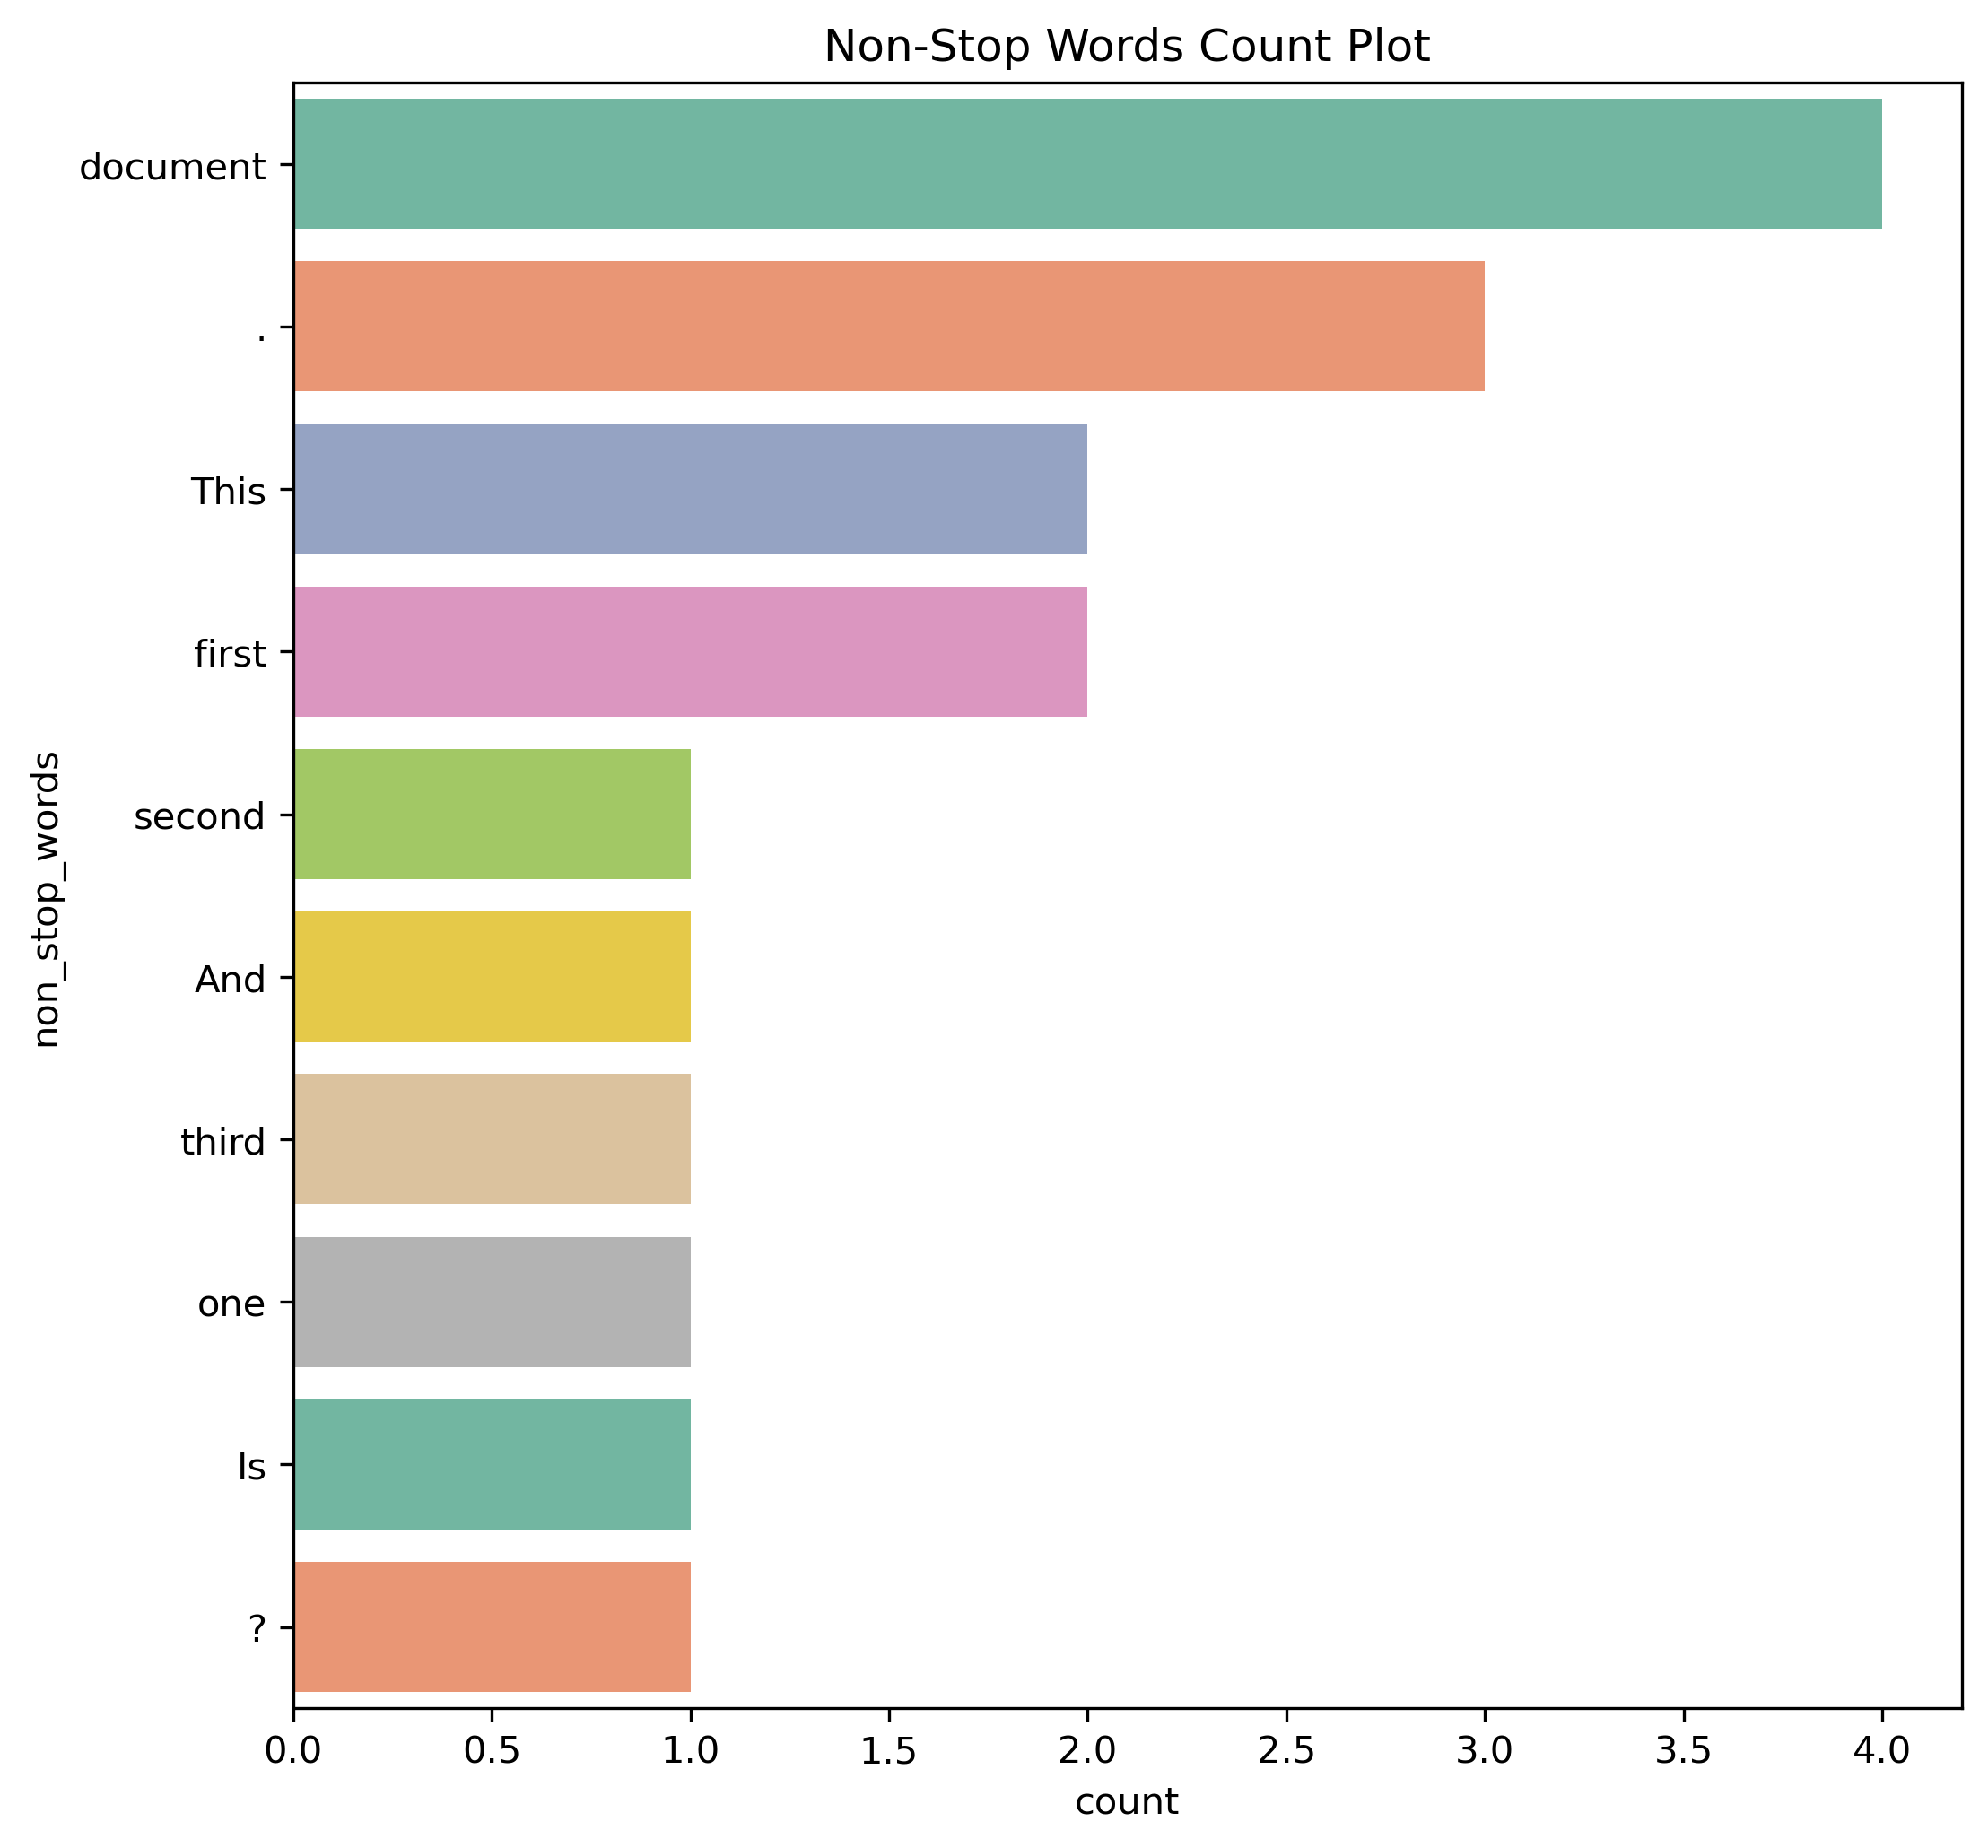

In [39]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

In [40]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 25 Bigrams


In [41]:
bigrams

[('This', 'is'),
 ('is', 'the'),
 ('the', 'first'),
 ('first', 'document'),
 ('document', '.'),
 ('.', 'This'),
 ('This', 'document'),
 ('document', 'is'),
 ('is', 'the'),
 ('the', 'second'),
 ('second', 'document'),
 ('document', '.'),
 ('.', 'And'),
 ('And', 'this'),
 ('this', 'is'),
 ('is', 'the'),
 ('the', 'third'),
 ('third', 'one'),
 ('one', '.'),
 ('.', 'Is'),
 ('Is', 'this'),
 ('this', 'the'),
 ('the', 'first'),
 ('first', 'document'),
 ('document', '?')]

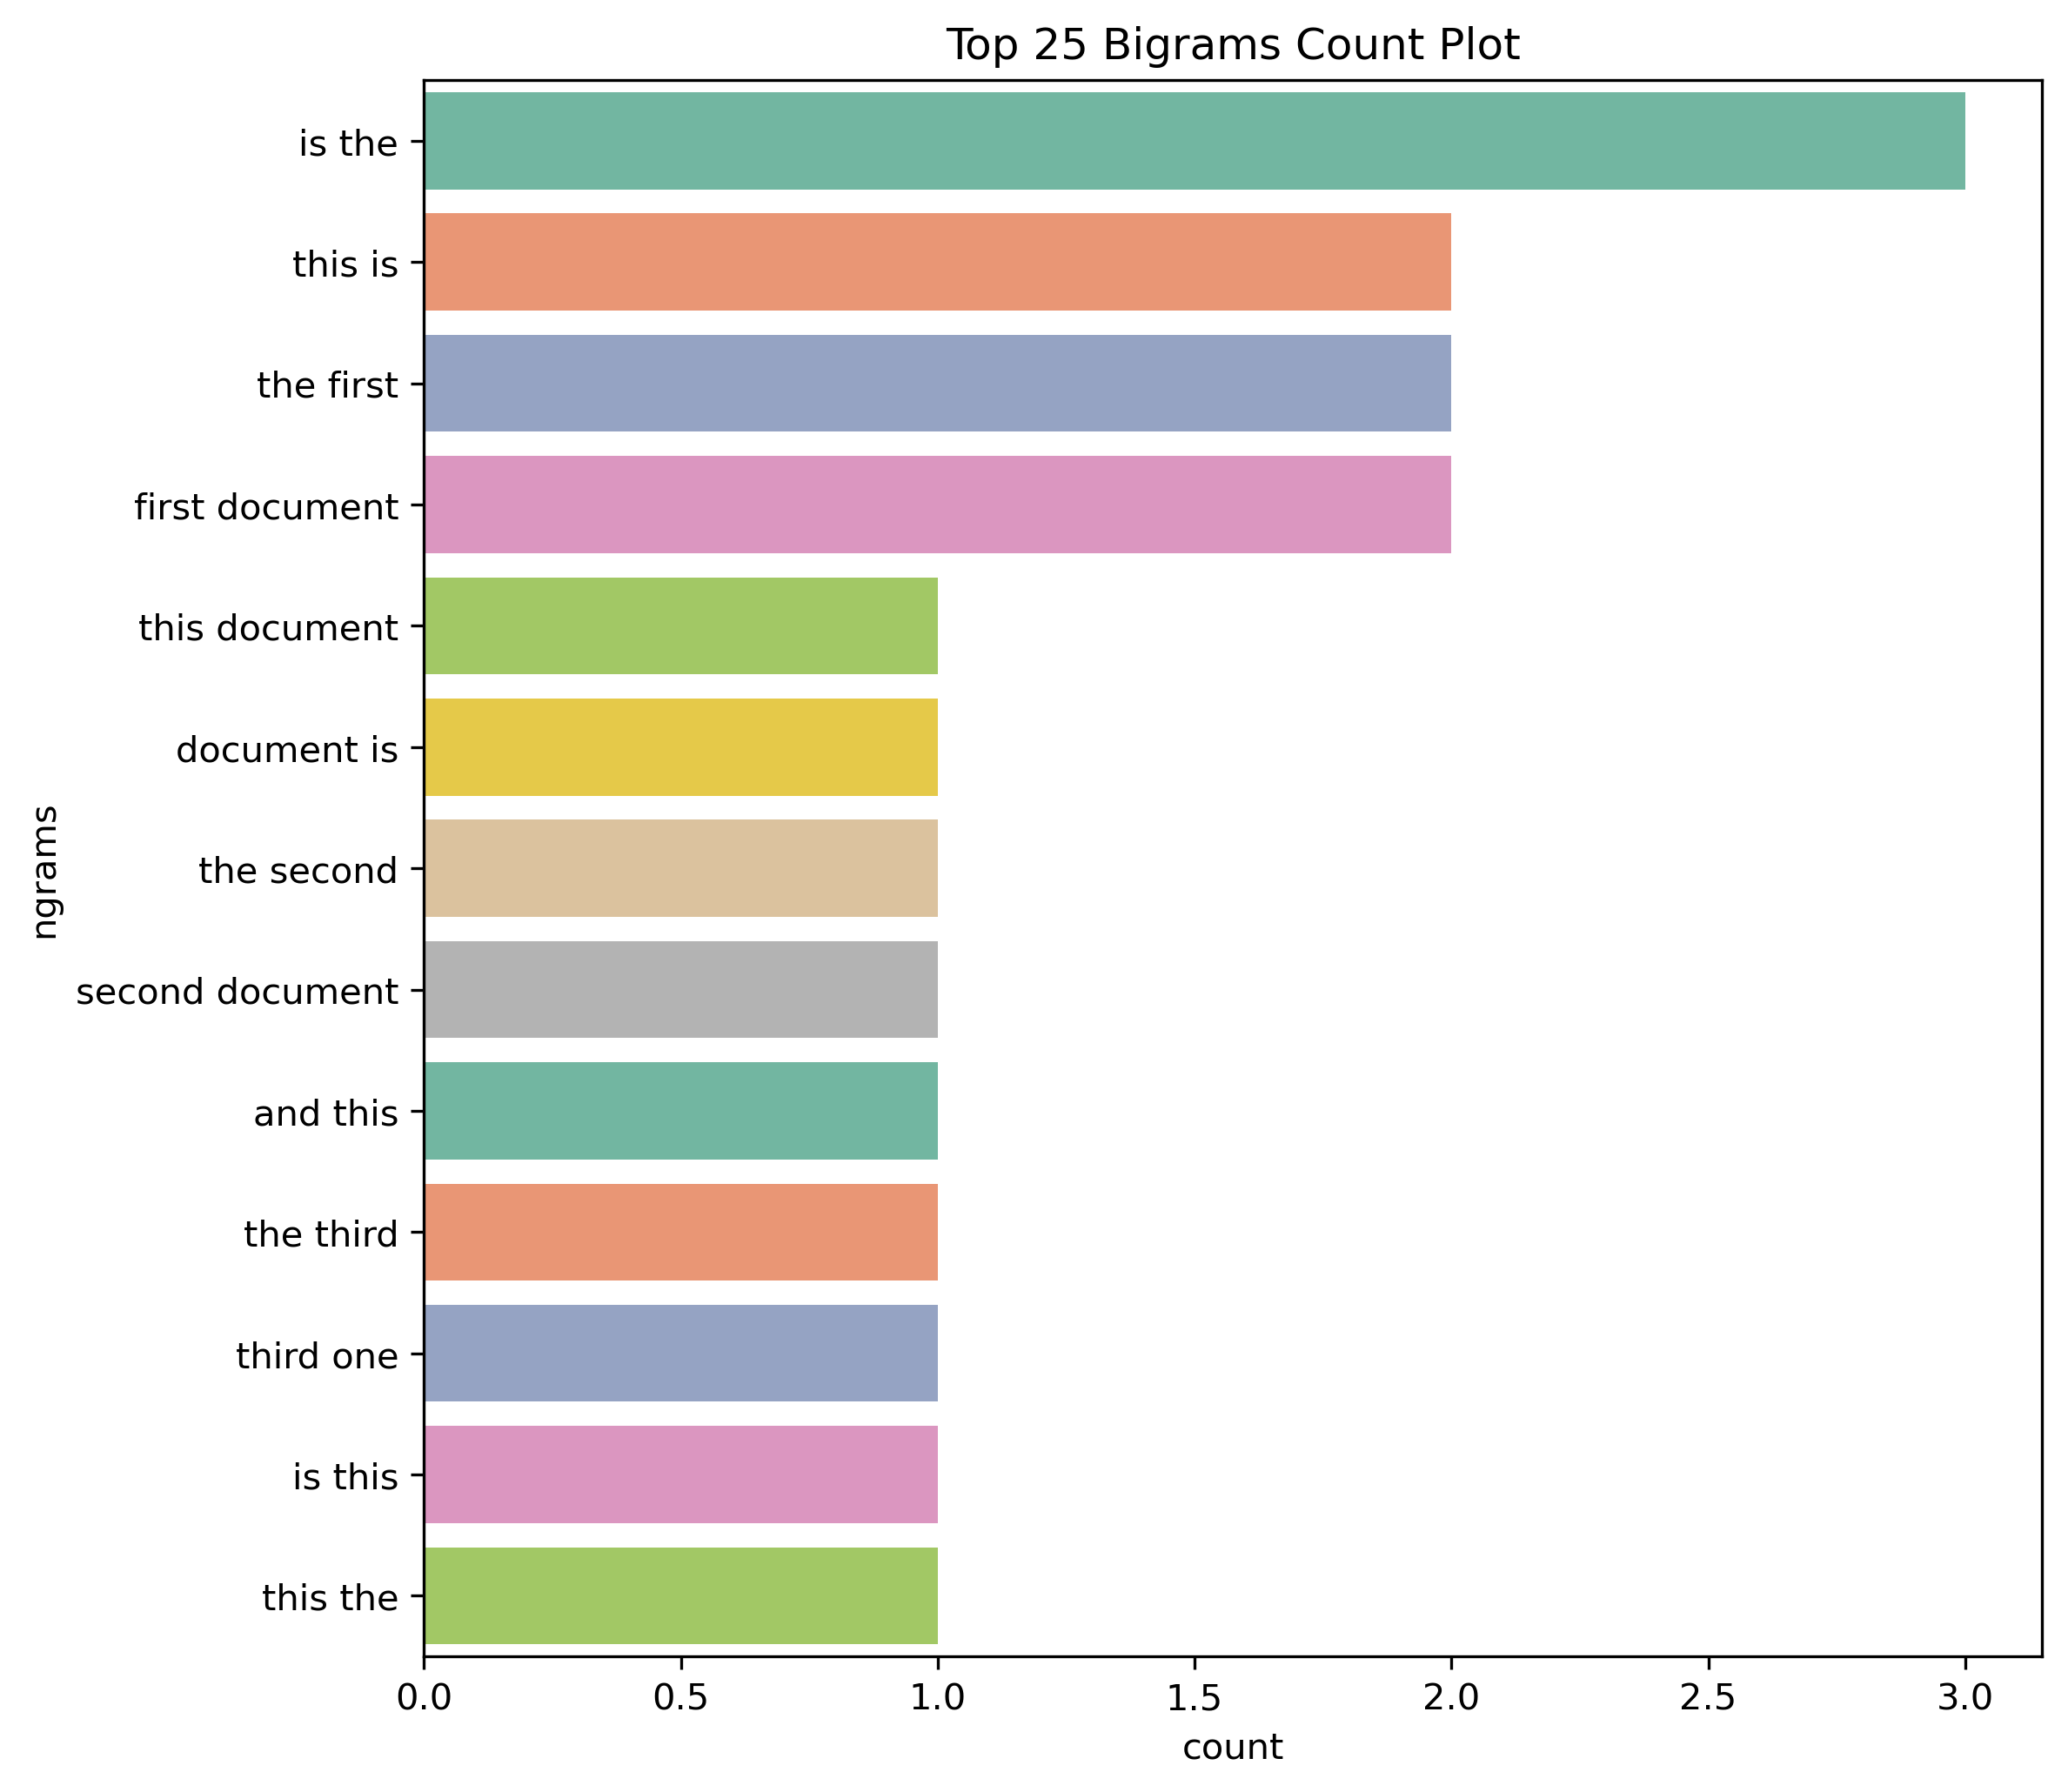

In [42]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

In [43]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 24 Trigrams


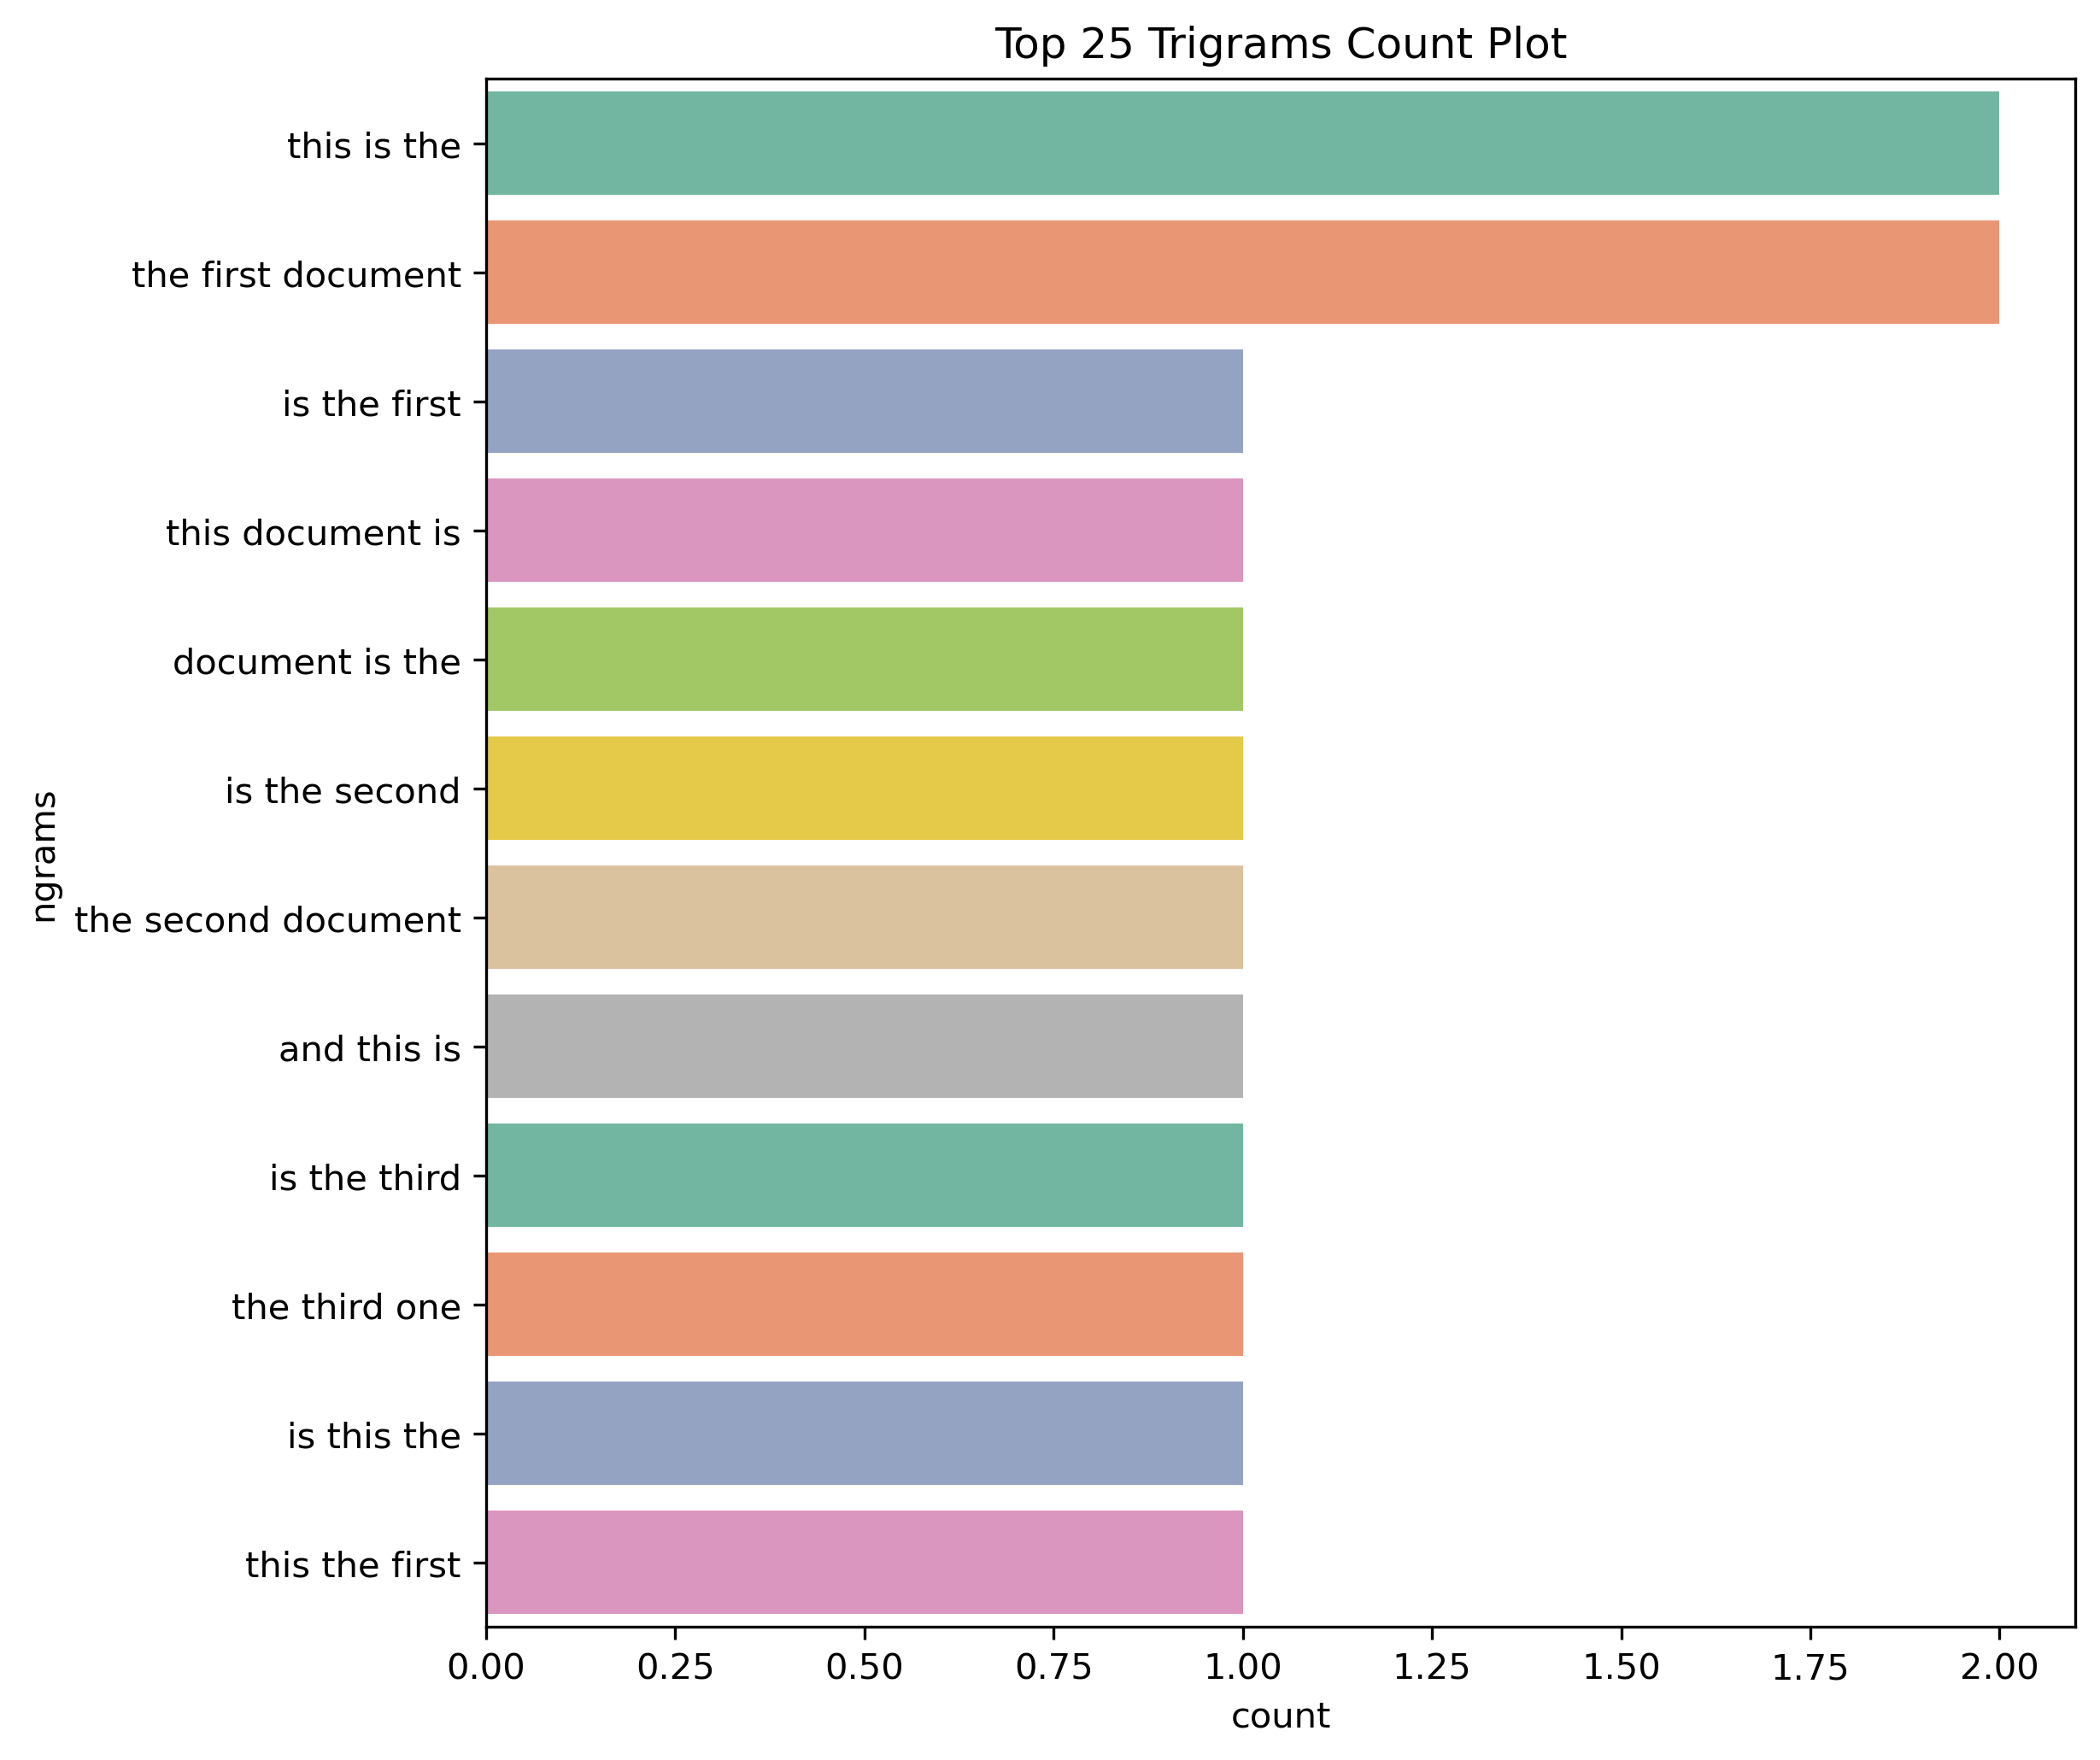

In [44]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, 
    title=f"Top {top_k} Trigrams Count Plot", 
    figsize=(8, 8), 
    dpi=300, 
    save_flag=False
)

In [45]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=2)

In [46]:
paragraph_analysis.extract_topics(vectorizer, lda_model)

› Topic 0:
    › ('document', 4.46757118788867)
    › ('this', 4.463149378641708)
    › ('the', 4.463149376312229)
    › ('is', 4.46314925616138)
    › ('first', 2.465660420863145)
    › ('second', 1.4709833232776046)
    › ('and', 1.453090853941661)
    › ('third', 1.4530899146734195)
    › ('one', 1.4530815370681318)
› Topic 1:
    › ('one', 0.5469184629318622)
    › ('third', 0.5469100853265743)
    › ('and', 0.546909146058333)
    › ('is', 0.5368507438386139)
    › ('the', 0.5368506236877655)
    › ('this', 0.5368506213582868)
    › ('first', 0.5343395791368488)
    › ('document', 0.5324288121113232)
    › ('second', 0.5290166767223894)
